# Analisis datos meteorologicos CNSI

https://thingspeak.com/channels/1506798/

https://www.cnsi.org.ar/yachting/meteorologia/datos-meteorologicos-cnsi/

CSV Downloaded from: https://thingspeak.com/channels/1506798/feeds.csv?results=26000

## Step 1: Import Libraries
First, import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load Data
Load the CSV file and rename the columns.

In [4]:
file_path = 'metoerologia.cnsi.san.isidrofeeds.csv' # Replace with your file path
data = pd.read_csv(file_path)
data.columns = ['created_at', 'entry_id', 'field1', 'Kn (Racha)', 'Kn (Viento)', 'Direccion viento', '° C (Temp)', 'Humedad (gm/m)', 'mm (Presión)', 'mm Precip']

## Step 3: Data Exploration
Explore the first few rows of the data.

In [5]:
data.head()


,created_at,entry_id,field1,Kn (Racha),Kn (Viento),Direccion viento,° C (Temp),Humedad (gm/m),mm (Presión),mm Precip
0,2023-05-10 06:34:27 UTC,95616,NaN,3.35,1.67,292,12.85,85.35,1020.3,0.0
1,2023-05-10 06:38:34 UTC,95617,NaN,3.31,2.14,286,12.84,85.52,1020.3,0.0
2,2023-05-10 06:44:28 UTC,95618,NaN,4.16,2.94,280,12.95,85.58,1020.3,0.0
3,2023-05-10 06:48:32 UTC,95619,NaN,3.58,2.70,273,12.70,85.52,1020.2,0.0
4,2023-05-10 06:54:29 UTC,95620,NaN,3.95,2.74,274,12.59,85.83,1020.2,0.0


## Step 4: Data Cleaning
Check for missing values.

In [6]:
data.isnull().sum()


created_at             0
entry_id               0
field1              8000
Kn (Racha)             0
Kn (Viento)            0
Direccion viento       0
° C (Temp)             0
Humedad (gm/m)         0
mm (Presión)           0
mm Precip              0
dtype: int64

## Step 5: Data Analysis
5.1 Temperature Analysis
Plot the temperature over time.



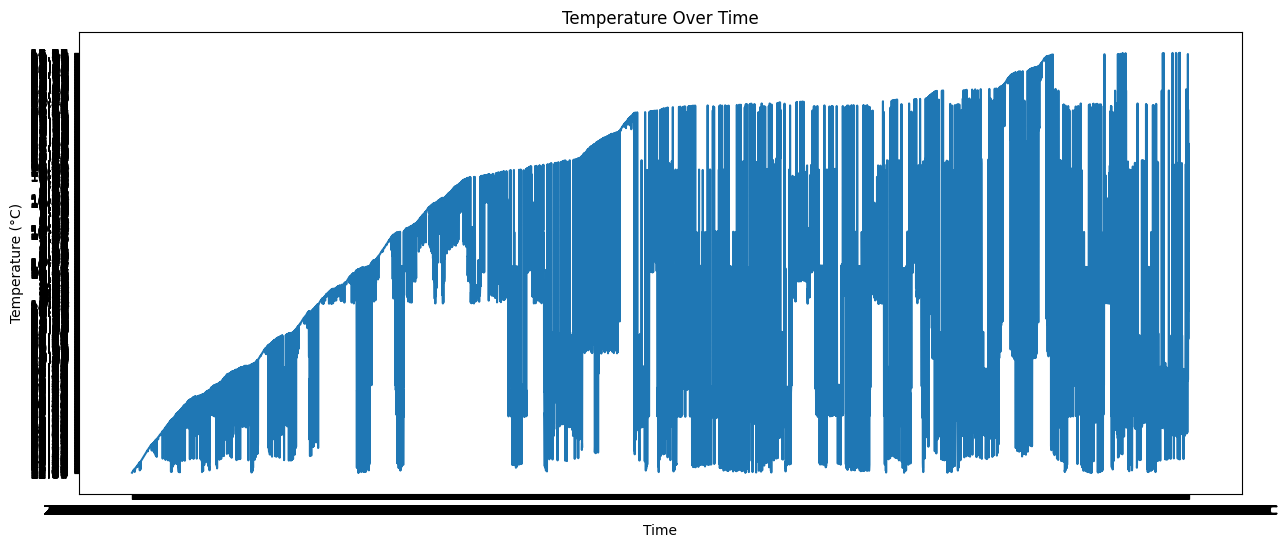

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(data['created_at'], data['° C (Temp)'])
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()


## 5.2 Wind Speed Analysis
Plot the wind speed over time.

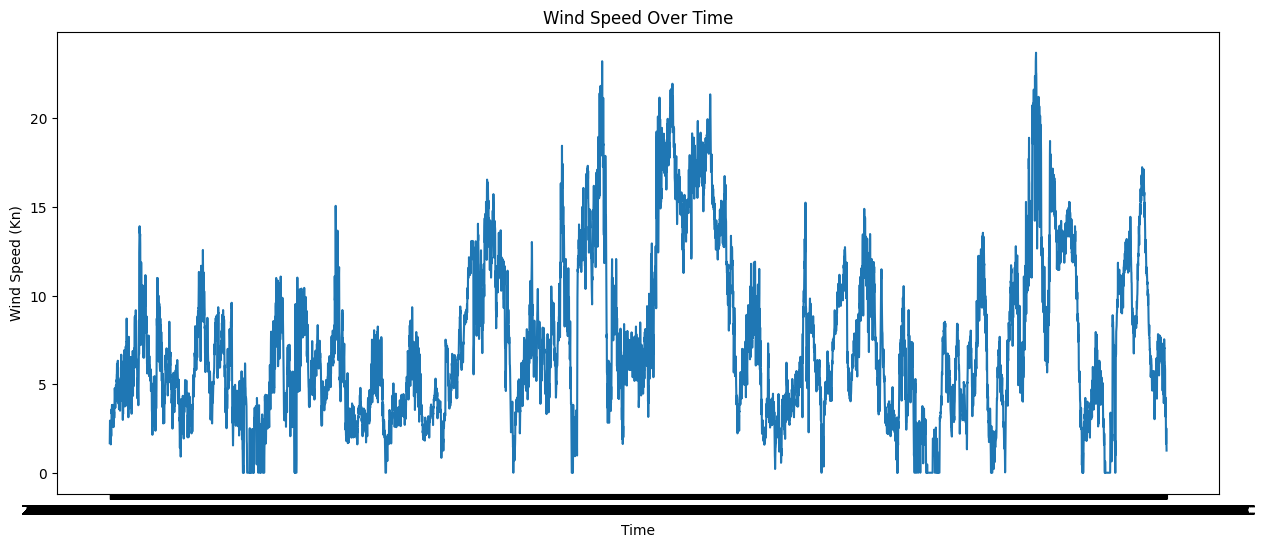

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(data['created_at'], data['Kn (Viento)'])
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (Kn)')
plt.show()


## 5.3 Correlation Analysis
Analyze the correlation between different variables.

/var/folders/xl/vq8zs8v1515dh146zbml0glr0000gn/T/ipykernel_42037/2137469423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[['Kn (Racha)', 'Kn (Viento)', '° C (Temp)', 'Humedad (gm/m)', 'mm (Presión)']].corr()


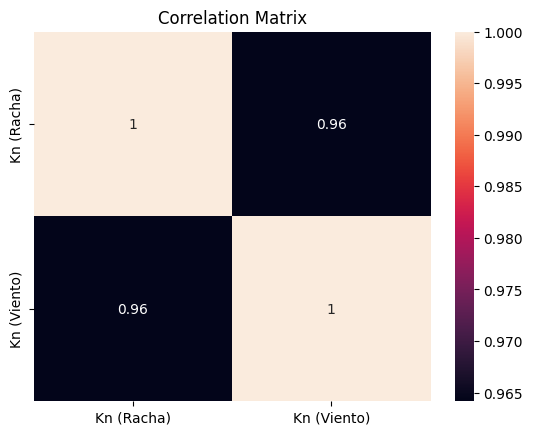

In [9]:
correlation_matrix = data[['Kn (Racha)', 'Kn (Viento)', '° C (Temp)', 'Humedad (gm/m)', 'mm (Presión)']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


# Trend analysis for 'Kn (Viento)', and 'Direccion viento'

## Step 1: Convert 'created_at' to DateTime
Make sure the 'created_at' column is in the correct DateTime format.

## Step 2: Set 'created_at' as Index
Set the 'created_at' column as the index to facilitate time series analysis.

In [10]:
data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index('created_at', inplace=True)


## Step 3: Resample and Compute the Mean
Resample the data by a suitable time frame (e.g., daily) and compute the mean to smooth out the noise. This will help in identifying the trend.



In [11]:
daily_data = data.resample('D').mean()


/var/folders/xl/vq8zs8v1515dh146zbml0glr0000gn/T/ipykernel_42037/333742221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.resample('D').mean()


## Step 4: Plot the Trend for 'Kn (Viento)'


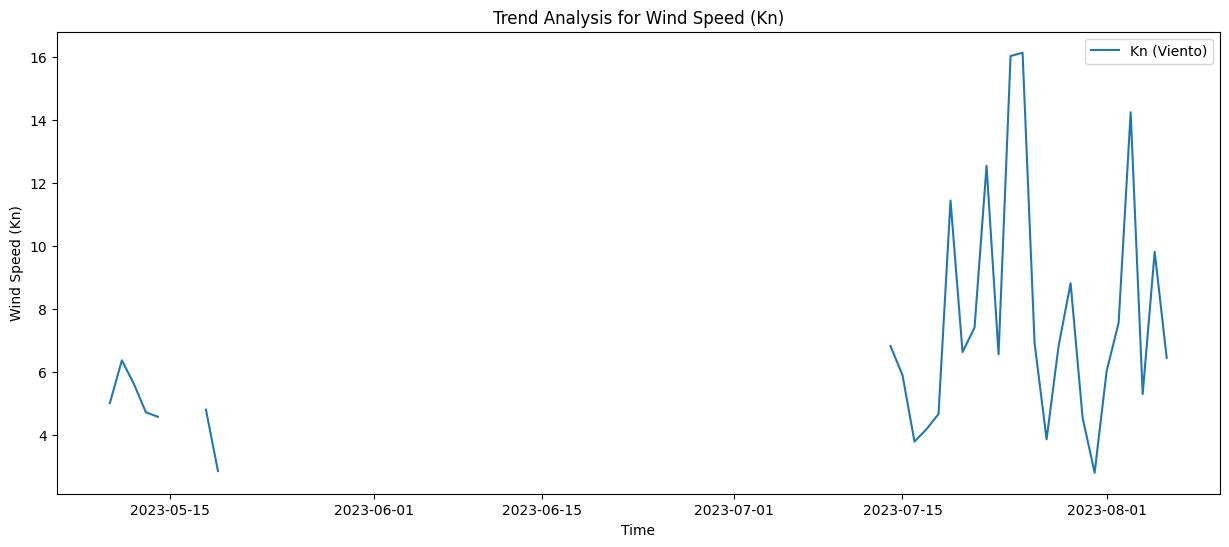

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Kn (Viento)'], label='Kn (Viento)')
plt.title('Trend Analysis for Wind Speed (Kn)')
plt.xlabel('Time')
plt.ylabel('Wind Speed (Kn)')
plt.legend()
plt.show()


## Step 5: Plot the Trend for 'Direccion viento'


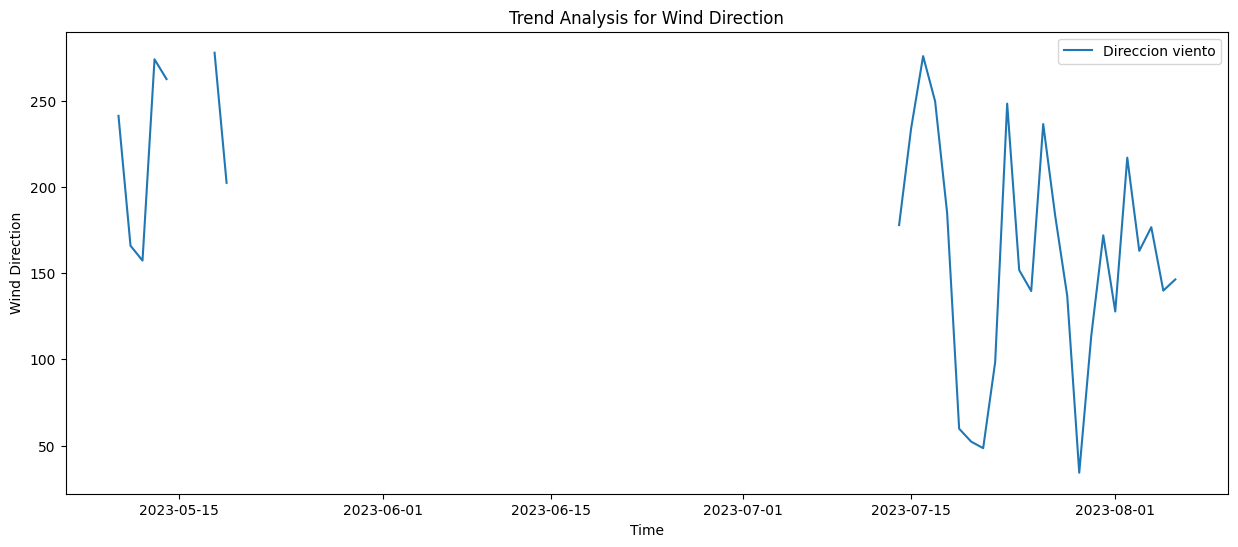

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Direccion viento'], label='Direccion viento')
plt.title('Trend Analysis for Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Direction')
plt.legend()
plt.show()


## Step 6: Optional - Apply a Rolling Mean
You can apply a rolling mean with a specific window size to further smooth the trend.

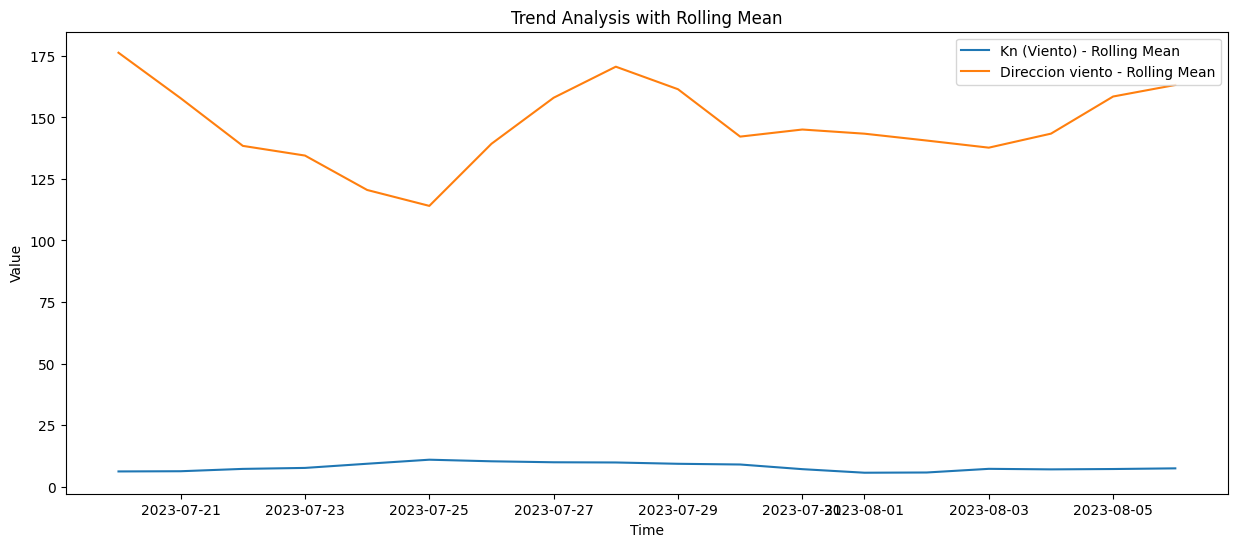

In [14]:
rolling_mean_wind_speed = daily_data['Kn (Viento)'].rolling(window=7).mean()
rolling_mean_wind_direction = daily_data['Direccion viento'].rolling(window=7).mean()

plt.figure(figsize=(15, 6))
plt.plot(rolling_mean_wind_speed, label='Kn (Viento) - Rolling Mean')
plt.plot(rolling_mean_wind_direction, label='Direccion viento - Rolling Mean')
plt.title('Trend Analysis with Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Advanced analysis for each month 

> include various aspects such as summary statistics, distribution analysis, trend decomposition, and seasonality analysis. 

## Step 1: Group Data by Month
You can group the data by month to analyze the wind speed for each month.



In [15]:
monthly_data = data['Kn (Viento)'].resample('M').mean()


## Step 2: Summary Statistics
Compute summary statistics for each month to understand the central tendency and dispersion.


In [16]:
summary_stats = monthly_data.describe()
print(summary_stats)


count    3.000000
mean     7.062154
std      1.622294
min      5.249901
25%      6.403760
50%      7.557619
75%      7.968280
max      8.378941
Name: Kn (Viento), dtype: float64


## Step 3: Distribution Analysis
Plot the distribution of wind speed for each month to understand its shape, central tendency, and spread.

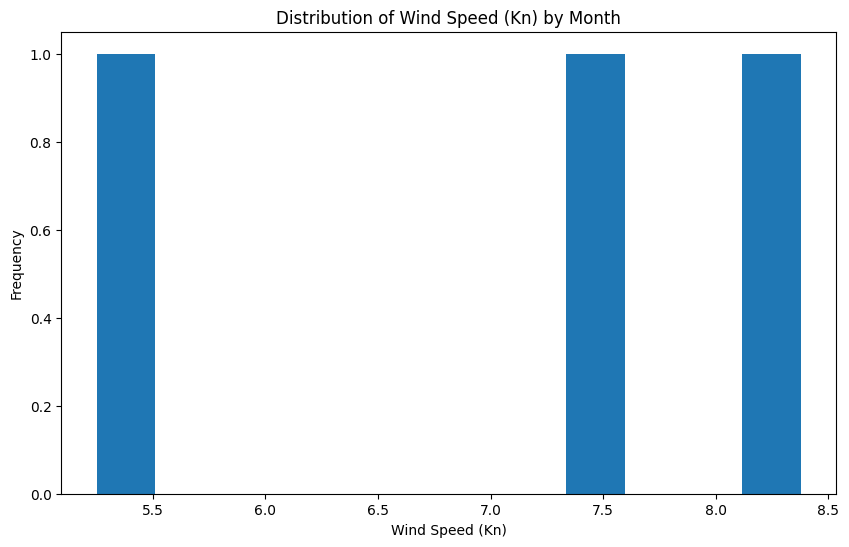

In [17]:
monthly_data.plot(kind='hist', bins=12, figsize=(10, 6))
plt.title('Distribution of Wind Speed (Kn) by Month')
plt.xlabel('Wind Speed (Kn)')
plt.show()


## Step 4: Trend Decomposition
Decompose the time series into trend, seasonal, and residual components using seasonal decomposition of time series (STL).

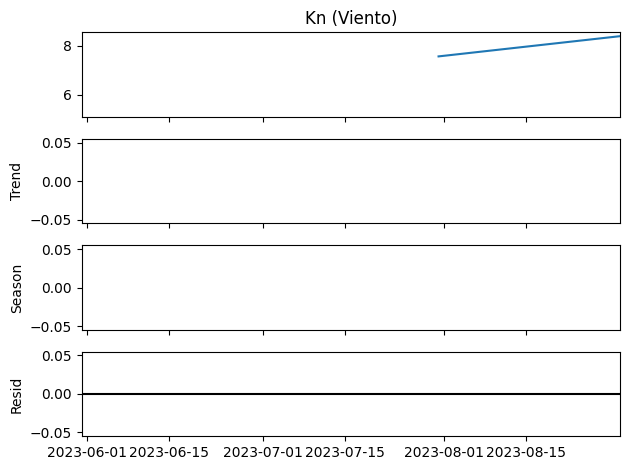

In [19]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly_data, seasonal=13)
result = stl.fit()
result.plot()
plt.show()


## Step 5: Seasonality Analysis
Analyze the seasonality pattern to understand if there's a recurring pattern in wind speed across different months.

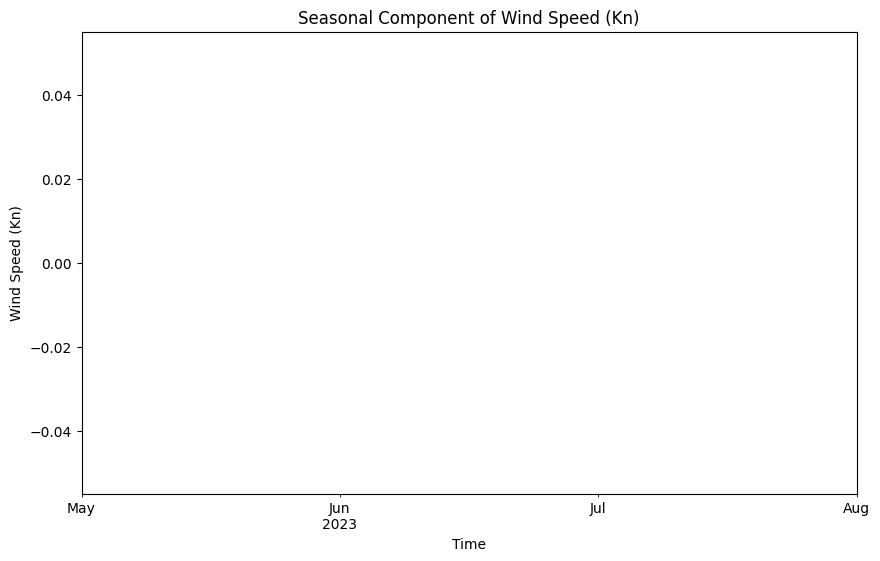

In [20]:
seasonal_data = result.seasonal
seasonal_data.plot(figsize=(10, 6))
plt.title('Seasonal Component of Wind Speed (Kn)')
plt.xlabel('Time')
plt.ylabel('Wind Speed (Kn)')
plt.show()


## Step 6: Autocorrelation Analysis
Analyze the autocorrelation to understand the relationship between the wind speed of a given month and the previous months.

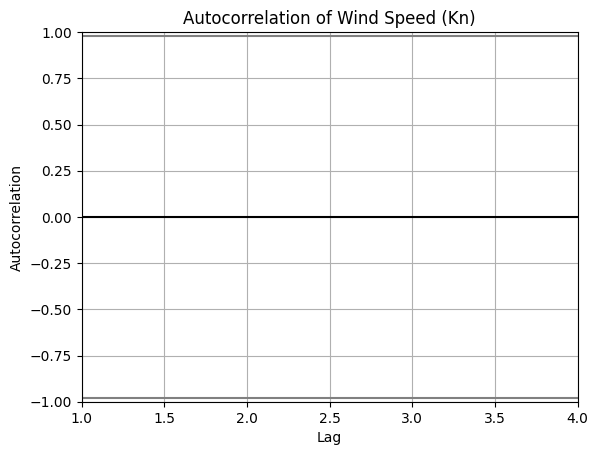

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(monthly_data)
plt.title('Autocorrelation of Wind Speed (Kn)')
plt.show()


## Step 7: Box Plot for Each Month
A box plot can provide insights into the distribution and outliers for each month.



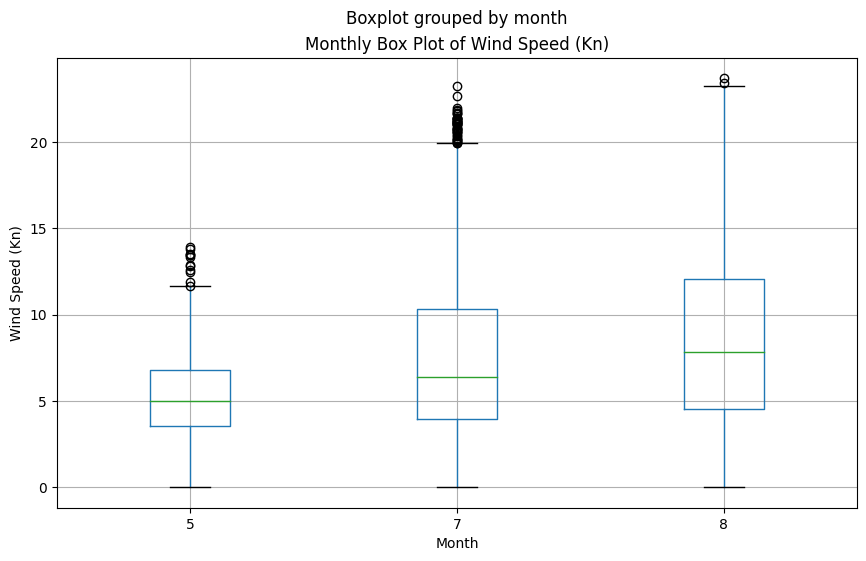

In [22]:
data['month'] = data.index.month
data.boxplot(column='Kn (Viento)', by='month', figsize=(10, 6))
plt.title('Monthly Box Plot of Wind Speed (Kn)')
plt.xlabel('Month')
plt.ylabel('Wind Speed (Kn)')
plt.show()


In [23]:
monthly_summary = data.groupby(data.index.month)['Kn (Viento)'].describe()
print(monthly_summary)


             count      mean       std  min    25%   50%    75%    max
created_at                                                            
5           1410.0  5.249901  2.566410  0.0  3.540  5.00   6.79  13.91
7           4994.0  7.557619  4.759531  0.0  3.950  6.38  10.35  23.22
8           1596.0  8.378941  4.889644  0.0  4.525  7.82  12.06  23.70


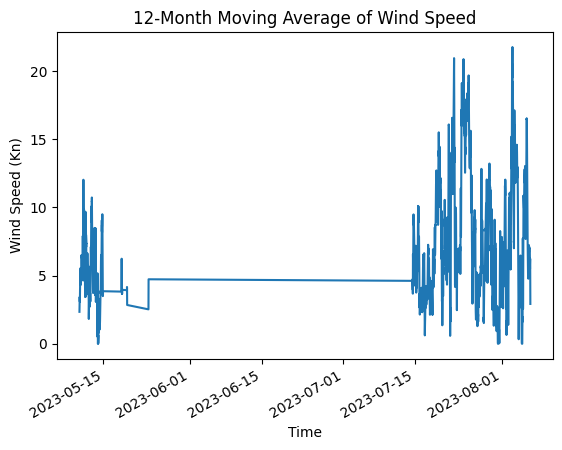

In [24]:
data['Kn (Viento)'].rolling(window=12).mean().plot()
plt.title('12-Month Moving Average of Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed (Kn)')
plt.show()


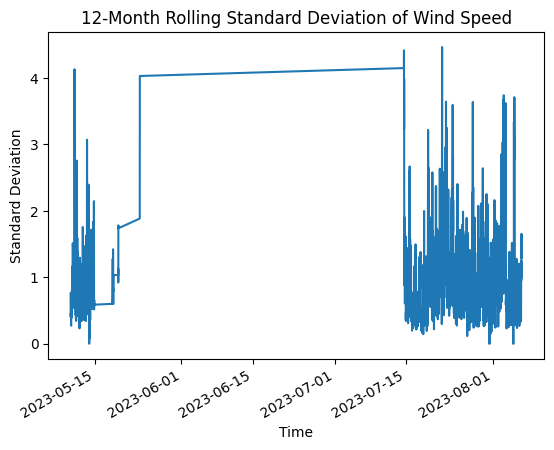

In [28]:
data['Kn (Viento)'].rolling(window=12).std().plot()
plt.title('12-Month Rolling Standard Deviation of Wind Speed')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.show()


In [29]:
correlation = data[['Kn (Viento)', 'Direccion viento']].corr()
print(correlation)


                  Kn (Viento)  Direccion viento
Kn (Viento)          1.000000         -0.248747
Direccion viento    -0.248747          1.000000


In [30]:
from scipy.stats import zscore

data['z_score'] = zscore(data['Kn (Viento)'])
anomalies = data[data['z_score'].abs() > 2]
print(anomalies)


                           entry_id  field1  Kn (Racha)  Kn (Viento)  \
created_at                                                             
2023-07-19 15:58:26+00:00     98472     NaN       18.66        16.54   
2023-07-21 15:12:23+00:00     99038     NaN       21.07        16.64   
2023-07-21 15:18:23+00:00     99039     NaN       21.27        18.45   
2023-07-21 15:32:23+00:00     99042     NaN       20.67        16.70   
2023-07-21 15:38:23+00:00     99043     NaN       20.30        16.79   
...                             ...     ...         ...          ...   
2023-08-05 21:48:21+00:00    103433     NaN       19.05        16.64   
2023-08-05 21:52:21+00:00    103434     NaN       19.07        16.87   
2023-08-05 22:12:20+00:00    103438     NaN       19.15        16.58   
2023-08-05 22:22:20+00:00    103440     NaN       19.77        16.83   
2023-08-05 22:28:20+00:00    103441     NaN       19.54        17.12   

                           Direccion viento ° C (Temp) Humedad 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No su

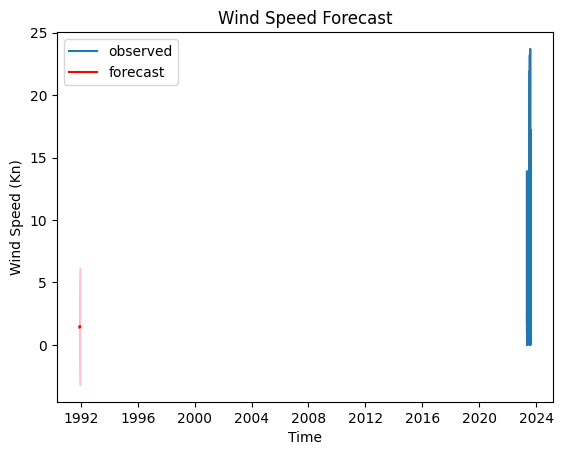

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(data['Kn (Viento)'], order=(5,1,0))
fit_model = model.fit()

# Forecast the next 12 periods
forecast = fit_model.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean

# Get the confidence intervals of the forecasts
confidence_intervals = forecast.conf_int()

# Plot the forecast along with the confidence intervals
plt.plot(data.index, data['Kn (Viento)'], label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='red', label='forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Time')
plt.ylabel('Wind Speed (Kn)')
plt.title('Wind Speed Forecast')
plt.legend()
plt.show()
